### Predicting the number of likes on Instagram using Regression Techniques

One billion people use Instagram every month, which makes it one of the most popular social networks worldwide.
Currently, there is an enormous scope market with the potential to be optimized to increase Instagram posts popularity and engagement.

Ref: https://upcommons.upc.edu/bitstream/handle/2117/339937/152579.pdf?sequence=1&isAllowed=y


---
### The Instagram Users Datetime Posts Dataset   
We explore the Instagram Users Datetime Posts dataset, which contains info of 1089 users' posts.

The dataset can estimate the number of likes/likes scores given a post based on different features such as the time and date of the post, type of the post, number of tags, numbers of comments, or how many days the post has been posted.

--
### Objective:
#### Estimate the number of likes based on number of tags, numbers of comments, or days passed from post.
---


### Dataset:
you can find the dataset on Canvas under Dataset section: Instagram_Data

### Steps to do:

    1- import libraries and initialize the plotting environment using matplotlib and/or seaborn  (1 point)

In [1]:
# write you code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

    2- Loading data into Panda datafram, name it insta_df (1 point)
        * load only the first 2000 rows using the "nrows" parameter

#### Note: you should read just the 2000 examples of the data.

Otherwise, your execution time for each command will be long since the data has 178922 samples.

In [2]:
# write you code here
insta_df = pd.read_csv('Instagram_Data.csv',nrows = 2000)


##
insta_df

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17,58,186,0.04,Image,0,84,2020-08-25 18:09:56,2020,8,25,18,9
1996,17,81,193,0.06,Video,4,5,2020-08-18 02:39:23,2020,8,18,2,39
1997,17,251,194,0.19,Image,4,13,2020-08-17 01:17:17,2020,8,17,1,17
1998,17,962,197,0.72,Images,0,38,2020-08-14 18:48:13,2020,8,14,18,48


    3- Show the 10 first rows of the data, its shape, and the coulmens names: (3 points)
    

In [3]:
# 10 first rows of the data
insta_df.head(10)

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
5,1,539,677,0.79,Images,3,3,2019-04-22 20:03:00,2019,4,22,20,3
6,1,330,677,0.49,Image,0,3,2019-04-22 15:07:34,2019,4,22,15,7
7,1,472,681,0.69,Images,3,7,2019-04-18 14:44:36,2019,4,18,14,44
8,1,272,682,0.40,Image,0,0,2019-04-17 15:42:56,2019,4,17,15,42
9,1,304,688,0.45,Images,3,0,2019-04-11 15:00:05,2019,4,11,15,0


In [4]:
# insta_df shape
insta_df.shape

(2000, 13)

In [5]:
# insta_df column names
insta_df.columns

Index(['User uuid', 'Likes', 'Days passed from post', 'Likes Score', 'Type',
       'Numer of Tags', 'Numer of Comments', 'Date Posted', 'Year', 'Month',
       'Day', 'Hour', 'Minute'],
      dtype='object')

    4- Check the number of samples in the dataset (1 point)

In [6]:
# insta_df row numbers:
insta_df.shape[0]

2000

    5- Check the data type of each column ( 1 point)

In [7]:
# Print datatypes
insta_df.dtypes

User uuid                  int64
Likes                      int64
Days passed from post      int64
Likes Score              float64
Type                      object
Numer of Tags              int64
Numer of Comments          int64
Date Posted               object
Year                       int64
Month                      int64
Day                        int64
Hour                       int64
Minute                     int64
dtype: object

    6- Remove columns from the dataframe:

        a. Remove user id from the insta_df as there is no useful information from this column. (1 point)

        b. Remove the Likes Score since it is calculated from the number of likes. (1 point)

        c. Remove the date and time columns from the data frame since our goal is not to consider the posted date and time related to the number of likes (2 points)

In [8]:
# Remove User uuid
insta_df.drop('User uuid',axis = 1, inplace = True)

# Remove User Likes Score
insta_df.drop('Likes Score',axis = 1, inplace = True)

# Remove all columns between column index 1 to 3
columns_to_remove = ['Date Posted', 'Year', 'Month', 'Day', 'Hour', 'Minute']
insta_df.drop(columns=columns_to_remove, inplace=True)

# show the insta_df after you remove the required columns
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,Image,3,11
1,385,657,Image,0,1
2,373,666,Images,4,15
3,312,667,Images,4,1
4,513,674,Images,5,0
...,...,...,...,...,...
1995,58,186,Image,0,84
1996,81,193,Video,4,5
1997,251,194,Image,4,13
1998,962,197,Images,0,38


    7- Check how many unique values are on the "Type" column. ( 1 point)
        * you can use the unique() function if you wish

In [9]:
# write you code here

insta_df['Type'].unique()

array(['Image', 'Images', 'Video'], dtype=object)

    8- Use label encoder to change the "Type" coulmn values to numeric values (2 point)

In [10]:
# Encode "Type"
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

insta_df['Type'] = label_encoder.fit_transform(insta_df['Type'])

##
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,0,3,11
1,385,657,0,0,1
2,373,666,1,4,15
3,312,667,1,4,1
4,513,674,1,5,0
...,...,...,...,...,...
1995,58,186,0,0,84
1996,81,193,2,4,5
1997,251,194,0,4,13
1998,962,197,1,0,38


    9- Check how many NaN values are in each column:

        a. How many NaNs as total ( 1 point)

        b. How many NaNs as a percentage of overall data ( 1 point)

In [11]:
# a. How many NaNs as total
total_nan_count = insta_df.isnull().sum().sum()

total_nan_count

0

In [12]:
# b. How many NaNs as a percentage of overall data
total_values = insta_df.size

percentage_nan = (total_nan_count / total_values) * 100

percentage_nan 

0.0

    10- Divide the data into features (X), and target (y) --> your target is Likes  (2 points)

In [13]:
# your featuers X:
X = insta_df.drop(columns=['Likes'])
##
X

,Days passed from post,Type,Numer of Tags,Numer of Comments
0,657,0,3,11
1,657,0,0,1
2,666,1,4,15
3,667,1,4,1
4,674,1,5,0
...,...,...,...,...
1995,186,0,0,84
1996,193,2,4,5
1997,194,0,4,13
1998,197,1,0,38


In [14]:
# your target y:
y = insta_df['Likes']
##
y

0       506
1       385
2       373
3       312
4       513
       ... 
1995     58
1996     81
1997    251
1998    962
1999    179
Name: Likes, Length: 2000, dtype: int64

    11- Checking for Multicollinearity for features (X) using a correlation matrix. (1 points)

In [15]:
# write your code here:

X.corr()

,Days passed from post,Type,Numer of Tags,Numer of Comments
Days passed from post,1.000000,-0.146155,-0.170063,-0.115434
Type,-0.146155,1.000000,-0.013724,0.002244
Numer of Tags,-0.170063,-0.013724,1.000000,0.053189
Numer of Comments,-0.115434,0.002244,0.053189,1.000000


    12- From the above pairplot, what did you observe? ( 1 points)

##### Write your answer here:

-- Left diagonal of the above matrix represents that correlation of each feature with itself is 1 bcoz it perfectly correlates with itself.


-- "Days passed from post" column has weak negative correlation with "Type," "Numer of Tags," and "Numer of Comments" and similarly for other features as well.

    13- Use a scatter plot to check each feature's relationship with the target variable, Likes. (1 points)

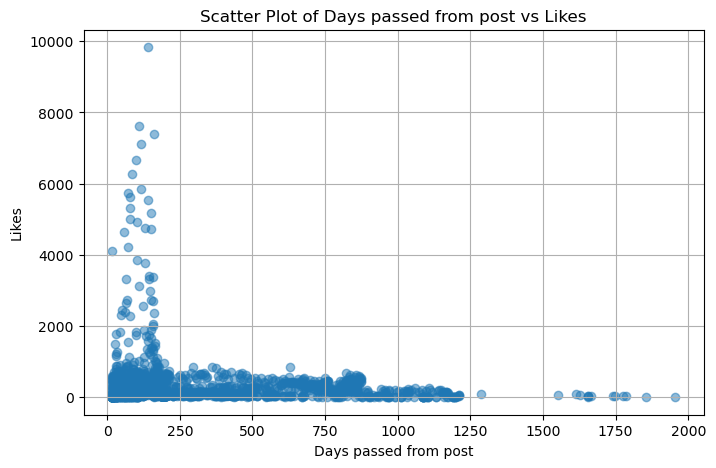

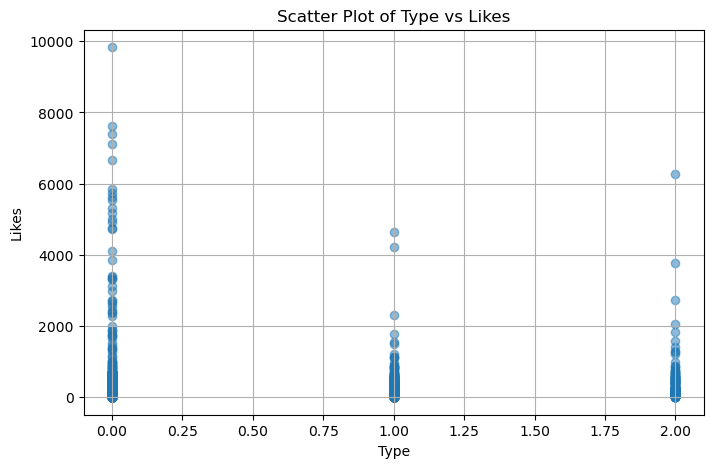

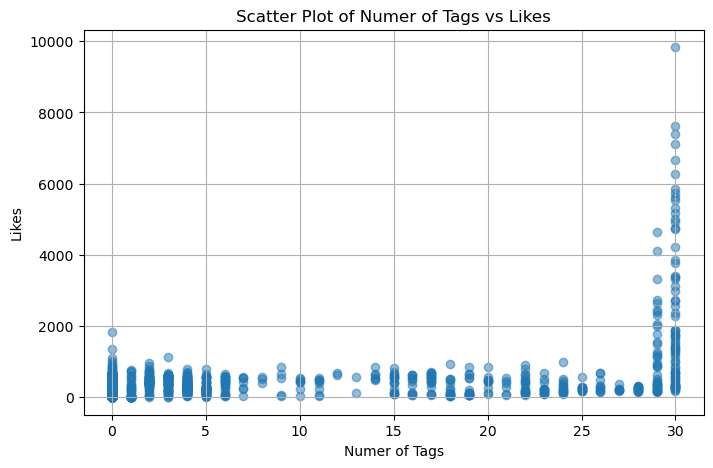

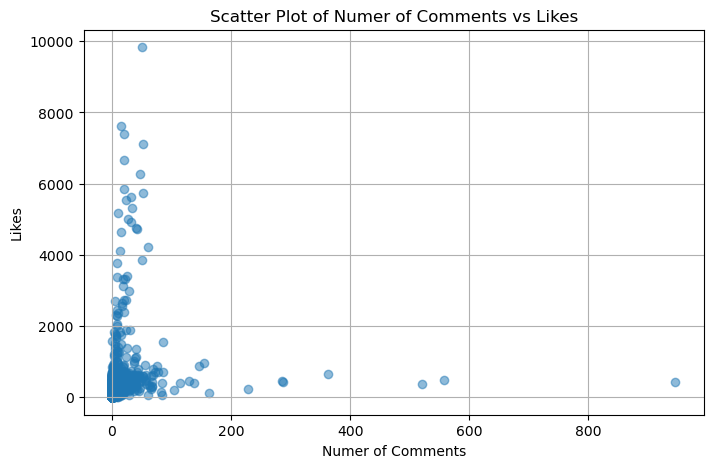

In [16]:
# write your code here

for feature in X.columns:
    plt.figure(figsize=(8, 5))
    plt.scatter(X[feature], y, alpha=0.5)
    plt.title(f"Scatter Plot of {feature} vs Likes")
    plt.xlabel(feature)
    plt.ylabel("Likes")
    plt.grid(True)
    plt.show()

    14- From the above pairplot, what did you observe? ( 1 points)


##### Write your answer here:

-- In 1st scatterplot, no. of likes ranges uptil 10,000 when days passed from the post were uptil 250 days, after which likes were around 1000 or less.

-- In 2nd scatterplot, you see that more likes are there for just 1 image post as compared to images and video posts.

-- In 3rd scatterplot, we observe that as no. of tags crosses 28, no. of likes increases drastically. Otherwise likes are around 1000 only.

-- In 4th scatterplot, if your no. of comments is under 200,  you can get significant amount of likes ranging uptil 10k but as your no. of comments are above 200, you will hardly get any likes.

    15- Display the target distribution using histogram (1 points)

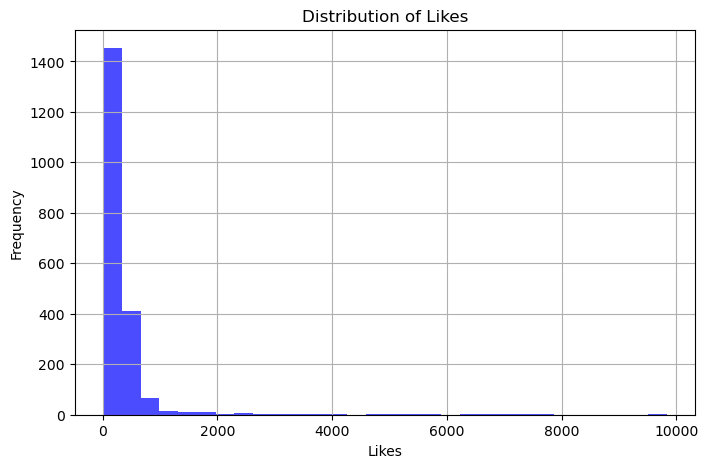

In [17]:
# write your code here:

plt.figure(figsize=(8, 5))
plt.hist(y, bins=30, color='blue', alpha=0.7)
plt.title("Distribution of Likes")
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

    16- From the above histogram, what did you observe about the target distribution? ( 1 point)
    

##### Write your answer here:

-- Less no. of likes for posts(below 1k) have massive frequency .


-- But as no. of likes increases or it crosses 1k likes, there is negligible frequency.

    17-Transfer the target y into log to have the normal distributions: (1 point)

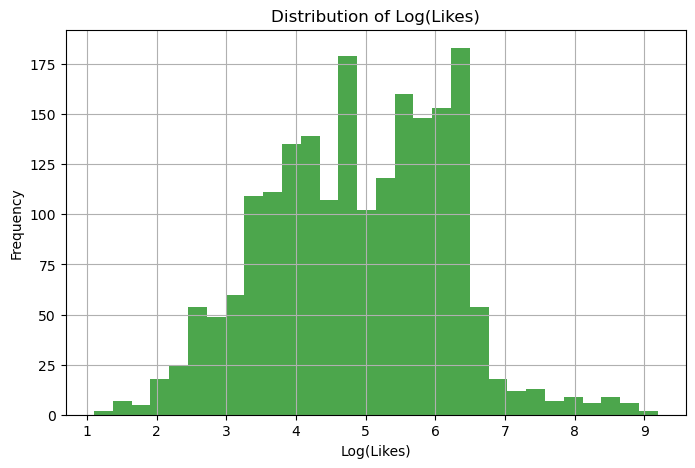

In [18]:
#transfer the target y into log

y_log = np.log(y)

plt.figure(figsize=(8, 5))
plt.hist(y_log, bins=30, color='green', alpha=0.7)
plt.title("Distribution of Log(Likes)")
plt.xlabel("Log(Likes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Preparing the machine learning pipeline


    18- Splitting the data into training 80% and testing sets 20%. (1 point)
        * print the sizes of our training and test set to verify if the splitting has occurred properly. (1 point)

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
print("Size of training set (X_train):", X_train.shape)
print("Size of testing set (X_test):", X_test.shape)
print("Size of training set (y_train):", y_train.shape)
print("Size of testing set (y_test):", y_test.shape)



Size of training set (X_train): (1600, 4)
Size of testing set (X_test): (400, 4)
Size of training set (y_train): (1600,)
Size of testing set (y_test): (400,)


    19- Use Pipeline class with the cross-validation to fit the scaling on only the training dataset and evaluate the linear regression model, (Use k=10 and MSE as your metric)( 2 point)

        * 'neg_mean_squared_error' returns the negated value of the MSE; make sure to take the absolute to get the positive one (1 point)
        * print the average MSE (1 point)

In [27]:
# writer your code here:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error

# Create a pipeline with scaling and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', LinearRegression())  # Linear regression model
])

# Define the metric as neg_mean_squared_error (we will convert to positive later)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform k-fold cross-validation (k=10) and calculate MSE
mse_scores = -cross_val_score(pipeline, X_train, y_train, cv=10, scoring=mse_scorer)

# Calculate the average MSE
average_mse = mse_scores.mean()

# Print the average MSE
print("Average MSE (Mean Squared Error) from 10-fold cross-validation:", average_mse)


Average MSE (Mean Squared Error) from 10-fold cross-validation: 1.2696532496922268


    20- Hyperparameters tuning using GridSearchCV (Use k=10 and MSE as your metric):

        A. Ridge regression:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Ridge regression (1 point)
            * print the best score and the best alpha value (1 point)

In [28]:
# write your code here:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the hyperparameter grid for alpha values
param_grid = {'alpha': [10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3]}

# Create a Ridge regression model
ridge_model = Ridge()

# Create a GridSearchCV object with k=10 and MSE as the scoring metric
grid_search = GridSearchCV(ridge_model, param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best score and best alpha value
best_score = -grid_search.best_score_  # Convert to positive for MSE
best_alpha = grid_search.best_params_['alpha']

# Print the best score and best alpha value
print("Best Score (MSE) from Ridge regression:", best_score)
print("Best Alpha Value for Ridge regression:", best_alpha)


Best Score (MSE) from Ridge regression: 1.2693967501659307
Best Alpha Value for Ridge regression: 100


        B. Lasso:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Lasso method. (1 point)
            * print the best score and the best alpha value (1 point)

In [29]:
# write your code here:

from sklearn.linear_model import Lasso

# Create a Lasso regression model
lasso_model = Lasso()

# Define the hyperparameter grid for alpha values
param_grid = {'alpha': [10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3]}

# Create a GridSearchCV object with k=10 and MSE as the scoring metric
grid_search = GridSearchCV(lasso_model, param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best score and best alpha value
best_score = -grid_search.best_score_  # Convert to positive for MSE
best_alpha = grid_search.best_params_['alpha']

# Print the best score and best alpha value
print("Best Score (MSE) from Lasso regression:", best_score)
print("Best Alpha Value for Lasso regression:", best_alpha)


Best Score (MSE) from Lasso regression: 1.2695271462164206
Best Alpha Value for Lasso regression: 0.01


#### Robust regression

      21- Use Pipeline class with the cross-validation with k= 10 to fit the scaling on only the training dataset, and evaluate the models using 'neg_mean_squared_error':
    
            A.  The Huber regression model module ( 1 points)
                * print the absolute average MSE (1 point)

In [30]:
# write your code here:

from sklearn.linear_model import HuberRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Create a pipeline with scaling and Huber regression
huber_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', HuberRegressor())  # Huber regression model
])

# Define the scoring metric as neg_mean_squared_error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform k-fold cross-validation (k=10) and calculate MSE
huber_mse_scores = -cross_val_score(huber_pipeline, X_train, y_train, cv=10, scoring=mse_scorer)

# Calculate the absolute average MSE
absolute_average_mse = np.abs(huber_mse_scores.mean())

# Print the absolute average MSE
print("Absolute Average MSE (Mean Squared Error) from Huber regression:", absolute_average_mse)


Absolute Average MSE (Mean Squared Error) from Huber regression: 1.6378851316174736


        B.  The RANSAC regression model modle ( 1 point)
            * print the absolute avarge MSE (1 point)

In [31]:
# write your code here:

from sklearn.linear_model import RANSACRegressor

# Create a pipeline with scaling and RANSAC regression
ransac_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', RANSACRegressor())  # RANSAC regression model
])

# Perform k-fold cross-validation (k=10) and calculate MSE
ransac_mse_scores = -cross_val_score(ransac_pipeline, X_train, y_train, cv=10, scoring=mse_scorer)

# Calculate the absolute average MSE
absolute_average_mse_ransac = np.abs(ransac_mse_scores.mean())

# Print the absolute average MSE
print("Absolute Average MSE (Mean Squared Error) from RANSAC regression:", absolute_average_mse_ransac)


Absolute Average MSE (Mean Squared Error) from RANSAC regression: 13.374077796842453


    22- From the above models you validated using cross-validation, which model performed very well on average? (1 point)         

##### Write your answer here:

--Ridge and Lasso Regression models have the lowest average MSE values, which suggests that they performed well on average. 


--

    23- Use the Best model to build/fit your final model using your train-data.(5 points)

In [32]:
# write your code here:

# Define the best alpha value obtained during hyperparameter tuning (e.g., best_alpha = 100 for Ridge)
best_alpha = 100

# Create the final Ridge regression model with the best alpha value
final_ridge_model = Ridge(alpha=best_alpha)

# Fit the final model to the entire training dataset
final_ridge_model.fit(X_train, y_train)

# Optionally, you can evaluate the model on the testing dataset if needed
# y_pred = final_ridge_model.predict(X_test)
# final_mse = mean_squared_error(y_test, y_pred)
# print("Final MSE on Testing Data:", final_mse)



Ridge(alpha=100)

    24- Predict the number of likes for test data and compute the MSE (5 points)

In [36]:
# write your code here:

# Use the final Ridge regression model to make predictions on the test data
y_pred_test = final_ridge_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the predictions on the test data
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the MSE on the test data
print("MSE on Testing Data:", mse_test)


y_pred_test


MSE on Testing Data: 1.3010237753960114


array([4.73590557, 4.43121485, 6.6357738 , 4.46123386, 4.56145239,
       4.67424602, 4.34644873, 4.45617834, 5.03810155, 6.55078107,
       4.99578994, 4.60656984, 4.55530001, 4.9531038 , 4.54278862,
       4.67284284, 4.4330352 , 4.78695388, 4.77347814, 4.45034785,
       4.47390424, 4.35429794, 4.50979703, 4.54402065, 4.84704939,
       5.16228108, 4.58401112, 4.34679053, 4.41994766, 4.7450213 ,
       4.43753839, 4.34644873, 4.52413436, 4.42131485, 4.54402065,
       4.55017303, 5.81236086, 4.61028199, 4.52317092, 4.621573  ,
       5.10147901, 4.31530905, 4.62496717, 5.131474  , 6.28707527,
       4.34508154, 4.5855373 , 4.42762622, 5.05345868, 5.94266895,
       6.33344082, 4.58058096, 5.09764601, 4.51598097, 4.42165665,
       4.47361008, 6.36362605, 4.51563917, 5.70797827, 4.52025372,
       6.77882905, 4.80276111, 5.19527354, 4.54538784, 4.38375636,
       4.56239859, 4.42234025, 6.63976279, 5.01201348, 6.82029807,
       5.17364621, 4.52453811, 6.31012172, 4.51701854, 4.49801

    25- Write a conclusion about building a good model for predicting the number of likes using Instagram Users Datetime Posts. (10 points)

       your conclusion should include:
        * why a specific model performs better than other models and why a regression algorithm works well with this dataset.
        * Did Robust regression algorithms outperformance the linear regression baseline or linear regression after applying Shrinkage Methods? Why?

    Write a summary of what you understand about linear regression and cross-validation.

-- Building a good model for predicting the number of likes using Instagram Users' DateTime Posts involves several key considerations like choice of regression algorithm, model performance, and the impact of robust regression techniques.

-- In our analysis, Ridge and Lasso regressions emerged as strong candidates for predicting likes. These regularization-based algorithms perform well because they can handle multicollinearity in the dataset effectively.

-- we observed that robust regression techniques like Huber and RANSAC had higher average MSE values compared to Ridge and Lasso regression. This outcome suggests that, in this specific dataset, the robustness to outliers provided by Huber and RANSAC may not have been necessary, and the regularization-based Ridge and Lasso models performed better overall.

--Linear Regression: Linear regression is a powerful and interpretable tool for modeling the relationship between one or more independent variables and a dependent variable. It assumes a linear relationship and aims to minimize the sum of squared differences between observed and predicted values.

--Cross-Validation: Cross-validation is a crucial technique for assessing a model's performance and generalization capability. In our analysis, we used k-fold cross-validation (k=10) to evaluate different regression models. It involves splitting the data into training and testing subsets multiple times and calculating performance metrics on each fold. This helps in estimating how the model is likely to perform on unseen data and aids in model selection and hyperparameter tuning.



---
## All set

Please make sure you execute each cell before you submit your file; this is important becuse if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue.

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_pj_1 .
---